In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("salaries.csv")
print(df.to_string())

       company                  job     degree  salary_more_then_100k
0       google      sales executive  bachelors                      0
1       google      sales executive    masters                      0
2       google     business manager  bachelors                      1
3       google     business manager    masters                      1
4       google  computer programmer  bachelors                      0
5       google  computer programmer    masters                      1
6   abc pharma      sales executive    masters                      0
7   abc pharma  computer programmer  bachelors                      0
8   abc pharma     business manager  bachelors                      0
9   abc pharma     business manager    masters                      1
10    facebook      sales executive  bachelors                      1
11    facebook      sales executive    masters                      1
12    facebook     business manager  bachelors                      1
13    facebook     b

<Axes: xlabel='job'>

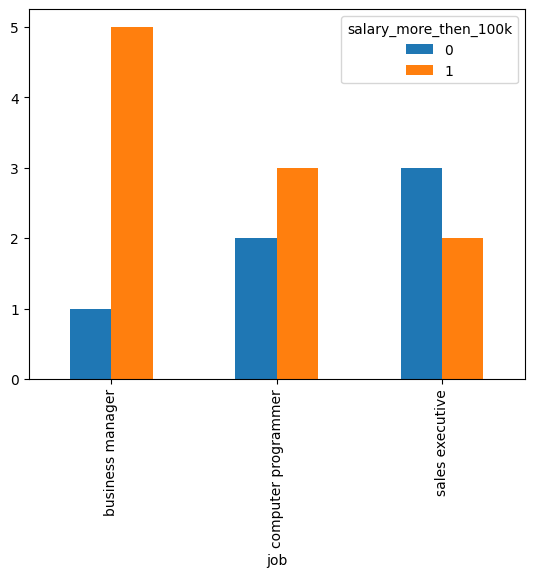

In [6]:
pd.crosstab(df['job'],df['salary_more_then_100k']).plot(kind = 'bar')

In [14]:
newdf = pd.get_dummies(df,dtype=int)
print(newdf.to_string())

    salary_more_then_100k  company_abc pharma  company_facebook  company_google  job_business manager  job_computer programmer  job_sales executive  degree_bachelors  degree_masters
0                       0                   0                 0               1                     0                        0                    1                 1               0
1                       0                   0                 0               1                     0                        0                    1                 0               1
2                       1                   0                 0               1                     1                        0                    0                 1               0
3                       1                   0                 0               1                     1                        0                    0                 0               1
4                       0                   0                 0               1           

In [4]:
trainx = .drop(columns = ['salary_more_then_100k'])
trainy = df[["salary_more_then_100k"]]
print(trainx.head(50))
print(trainy.head(50))

       company                  job     degree
0       google      sales executive  bachelors
1       google      sales executive    masters
2       google     business manager  bachelors
3       google     business manager    masters
4       google  computer programmer  bachelors
5       google  computer programmer    masters
6   abc pharma      sales executive    masters
7   abc pharma  computer programmer  bachelors
8   abc pharma     business manager  bachelors
9   abc pharma     business manager    masters
10    facebook      sales executive  bachelors
11    facebook      sales executive    masters
12    facebook     business manager  bachelors
13    facebook     business manager    masters
14    facebook  computer programmer  bachelors
15    facebook  computer programmer    masters
    salary_more_then_100k
0                       0
1                       0
2                       1
3                       1
4                       0
5                       1
6                  

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(trainx,trainy,test_size = 0.13)
print(x_train.to_string())


    company_abc pharma  company_facebook  company_google  job_business manager  job_computer programmer  job_sales executive  degree_bachelors  degree_masters
0                    0                 0               1                     0                        0                    1                 1               0
10                   0                 1               0                     0                        0                    1                 1               0
5                    0                 0               1                     0                        1                    0                 0               1
1                    0                 0               1                     0                        0                    1                 0               1
11                   0                 1               0                     0                        0                    1                 0               1
6                    1                 0      

In [43]:
print(x_test.to_string())

    company_abc pharma  company_facebook  company_google  job_business manager  job_computer programmer  job_sales executive  degree_bachelors  degree_masters
13                   0                 1               0                     1                        0                    0                 0               1
8                    1                 0               0                     1                        0                    0                 1               0
12                   0                 1               0                     1                        0                    0                 1               0


In [44]:
modeltraintest = LogisticRegression()
modeltraintest.fit(x_train,y_train)

LogisticRegression()

In [45]:
ans  = modeltraintest.predict(x_test)
ans

array([1, 1, 1], dtype=int64)

In [46]:
modeltraintest.score(x_train,y_train)

1.0

In [47]:
modeltraintest.score(x_test,y_test)

0.6666666666666666